In [7]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
train_file_path = '/content/drive/MyDrive/card/fraudTrain.csv'
test_file_path = '/content/drive/MyDrive/card/fraudTest.csv'
# Load train and test datasets
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
# Display first few rows of train and test datasets
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Data:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat    

In [8]:
print("Train Data - Missing Values:\n", train_data.isnull().sum())
print("\nTest Data - Missing Values:\n", test_data.isnull().sum())

Train Data - Missing Values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Test Data - Missing Values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state    

In [9]:
train_data = pd.get_dummies(train_data, columns=['gender', 'category'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['gender', 'category'], drop_first=True)

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize numerical features in train data
num_cols = ['amt', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])

# Normalize numerical features in test data
test_data[num_cols] = scaler.transform(test_data[num_cols])

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
# Replace with the correct file paths if needed
train_file_path = '/content/drive/MyDrive/churn/Churn_Modelling.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(train_file_path)

# Select relevant columns for features and target
feature_columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Define features and target
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of datasets
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Initialize Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_regression.fit(X_train, y_train)

# Predict on validation set
y_val_pred_lr = logistic_regression.predict(X_val)

# Evaluate model performance on validation set
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print("Classification Report:\n", classification_report(y_val, y_val_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_lr))


Train set shape: (8000, 11)
Validation set shape: (2000, 11)
Logistic Regression Model Performance:
Accuracy: 0.8005
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Confusion Matrix:
 [[1573   34]
 [ 365   28]]


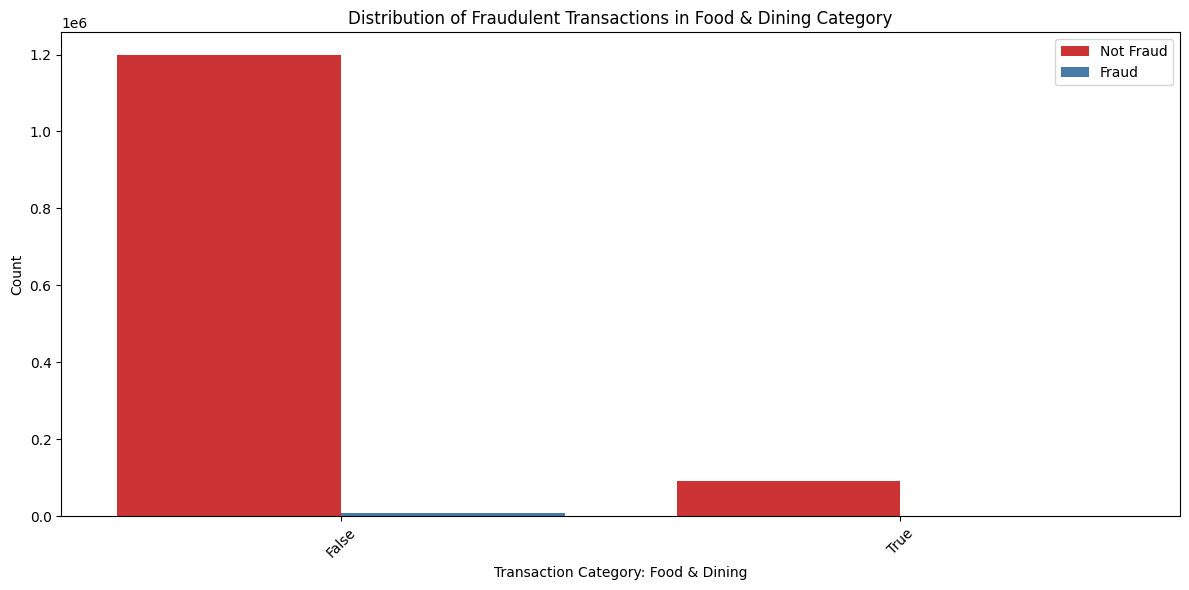

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df = train_data  # Replace with your actual DataFrame

# Distribution of Fraudulent Transactions by Category
plt.figure(figsize=(12, 6))
sns.countplot(x='category_food_dining', hue='is_fraud', data=df, palette='Set1')
plt.title('Distribution of Fraudulent Transactions in Food & Dining Category')
plt.xlabel('Transaction Category: Food & Dining')
plt.ylabel('Count')
plt.legend(['Not Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


LOGISTIC REGRESSION

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/churn/Churn_Modelling.csv')

# Select relevant columns for features and target
feature_columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Define features and target
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of datasets
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Initialize Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_regression.fit(X_train, y_train)

# Predict on validation set
y_val_pred_lr = logistic_regression.predict(X_val)

# Evaluate model performance on validation set
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print("Classification Report:\n", classification_report(y_val, y_val_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_lr))


Train set shape: (8000, 11)
Validation set shape: (2000, 11)
Logistic Regression Model Performance:
Accuracy: 0.8005
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Confusion Matrix:
 [[1573   34]
 [ 365   28]]


Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on validation set
y_val_pred_dt = decision_tree.predict(X_val)

# Evaluate model performance on validation set
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print("Classification Report:\n", classification_report(y_val, y_val_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_dt))


Decision Tree Model Performance:
Accuracy: 0.7805
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000

Confusion Matrix:
 [[1362  245]
 [ 194  199]]


Random Forest Classifier - ✅

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model with fewer estimators
random_forest = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on validation set
y_val_pred_rf = random_forest.predict(X_val)

# Evaluate model performance on validation set
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_val_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_rf))


Random Forest Model Performance:
Accuracy: 0.855
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.71      0.45      0.55       393

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

Confusion Matrix:
 [[1534   73]
 [ 217  176]]


Support Vector Machine (SVM)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred_knn = knn_model.predict(X_val)

# Evaluate model performance on validation set
print("K-Nearest Neighbors Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_knn))
print("Classification Report:\n", classification_report(y_val, y_val_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_knn))


K-Nearest Neighbors Model Performance:
Accuracy: 0.764
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86      1607
           1       0.24      0.09      0.14       393

    accuracy                           0.76      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.76      0.72      2000

Confusion Matrix:
 [[1491  116]
 [ 356   37]]


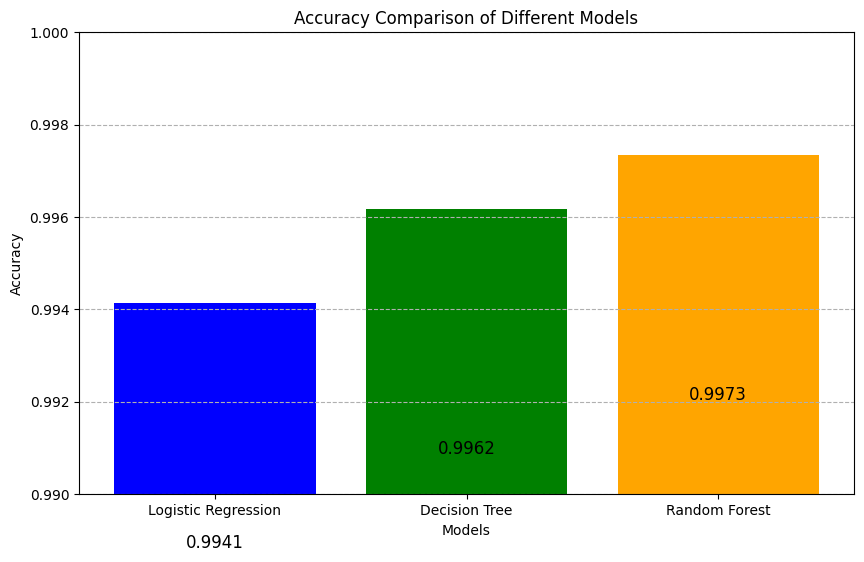

In [25]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.9941388551487458, 0.9961748317812867, 0.9973354927024891]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

# Adding text annotations for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.005, round(yval, 4), ha='center', va='top', fontsize=12)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.99, 1.0)  # Set y-axis limit to highlight differences
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

In [ ]:
import joblib
joblib.dump(random_forest, '/content/drive/MyDrive/movie/random_forest_model.pkl')

['/content/drive/MyDrive/movie/random_forest_model.pkl']

In [ ]:
import joblib

# Load the trained Random Forest model
random_forest = joblib.load('/content/drive/MyDrive/movie/random_forest_model.pkl')

# Assuming X_test is your test data (features) in the same format as used during training
# Replace X_test with your actual test data
y_pred = random_forest.predict(X_test)

# Assuming you want to print or use the predictions
print("Predictions:", y_pred)

Predictions: [0 0 0 ... 0 0 0]
